# Top 10 역의 월/주단위로 이용객수를 heatmap으로 표시해보기

### 분석대상역 : 서면/사상/남포/부산역/연산/자갈치/센텀시티/경성대부경대/하단/동래/부산대

In [1]:
import pandas as pd
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#prj1에서 저장한 dfg2 엑셀파일 읽어오기
data= pd.read_excel('./data2/부산일자별도시철도이용객수.xlsx') 

In [3]:
data.head()

,Unnamed: 0,년월일,역번호,역명,이용객수
0,0,2018-01-01,100,동매,1972.5
1,1,2018-01-01,101,신평,3783.5
2,2,2018-01-01,102,하단,11380.5
3,3,2018-01-01,103,당리,3385.0
4,4,2018-01-01,104,사하,2593.5


In [4]:
#열삭제 
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40880 entries, 0 to 40879
Data columns (total 4 columns):
년월일     40880 non-null datetime64[ns]
역번호     40880 non-null int64
역명      40880 non-null object
이용객수    40880 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
data.head()

,년월일,역번호,역명,이용객수
0,2018-01-01,100,동매,1972.5
1,2018-01-01,101,신평,3783.5
2,2018-01-01,102,하단,11380.5
3,2018-01-01,103,당리,3385.0
4,2018-01-01,104,사하,2593.5


In [6]:
# 역명확인후 역번호로 리스트 저장 해운대 203 , 부산역 113, 서면 119 , 센텀시티 206 , 경성대부경대 212 , 부산대 128 , 대연 213
data[data['역명']=='1서면']

,년월일,역번호,역명,이용객수
19,2018-01-01,119,1서면,27622.5
131,2018-01-02,119,1서면,44422.5
243,2018-01-03,119,1서면,44253.0
355,2018-01-04,119,1서면,45588.5
467,2018-01-05,119,1서면,49076.5
579,2018-01-06,119,1서면,45616.0
691,2018-01-07,119,1서면,29365.0
803,2018-01-08,119,1서면,41337.0
915,2018-01-09,119,1서면,44424.0
1027,2018-01-10,119,1서면,45100.5


### 역번호를 주면 일자별 데이터프레임 리턴하는 함수를 만들어볼까?

In [7]:
def subway_df(n) :
    df_f = data[data['역번호']== n]    #함수용 데이터프레임을 변수에 해당하는값으로 만든다.
    df_f=df_f.reset_index()
    # 컬럼명을 기존 데이터프레임에서 가져와서 변경하려면 string형태로 가져와야 한다. 
    t=df_f.loc[:0,['역명']].max().values[0] 
    df_f=df_f[['년월일','이용객수']]
    #컬럼명을 부산역으로 변경
    df_f.columns = ['년월일',t]   
    return df_f

In [8]:
subway_df(119)

,년월일,1서면
0,2018-01-01,27622.5
1,2018-01-02,44422.5
2,2018-01-03,44253.0
3,2018-01-04,45588.5
4,2018-01-05,49076.5
5,2018-01-06,45616.0
6,2018-01-07,29365.0
7,2018-01-08,41337.0
8,2018-01-09,44424.0
9,2018-01-10,45100.5


In [9]:
# 서면/사상/남포/부산역/연산/자갈치/센텀시티/경성대부경대/하단/동래/부산대
# 119 /227 /111 /113  /123  /110   /206     /212          /102 /125 /128
top_lst=[119,227,111,113,123,110,206,212,102,125,128]
top_lst

[119, 227, 111, 113, 123, 110, 206, 212, 102, 125, 128]

### for문으로 해당 리스트에 저장된 역번호들을 데이터 프레임으로 각각 자동으로 만들기

In [10]:
#for문으로 해당 리스트에 저장된 역번호들을 데이터 프레임으로 각각 만들기
for idx in range(len(top_lst)) :
    globals()['df{}'.format(idx)] = subway_df(top_lst[idx])

## 데이터프레임 병합도 for문으로 자동으로 하고 싶다 ㅠㅠ


In [11]:
df0.head()
#df10.head()

,년월일,1서면
0,2018-01-01,27622.5
1,2018-01-02,44422.5
2,2018-01-03,44253.0
3,2018-01-04,45588.5
4,2018-01-05,49076.5


In [12]:
range(len(top_lst)-1)

range(0, 10)

In [13]:
#개별로 데이터 프레임 안만들고 바로 merge를 해도 되지 않을까?
#df_m = pd.DataFrame(columns=['년월일', '역명']) #빈데이터 프레임
#일단 첫번째데이터프레임 df0기준으로 병합해보자 나머지 10개가 되도록 for문 수정 
for idx in range(len(top_lst)-1) :
    df0 = pd.merge(df0,subway_df(top_lst[idx+1]))


In [14]:
#병합
#df_m=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_1,df_2),df_4),df_5),df_6),df_7)
#len(df_7)
df_m = df0
df_m.head()

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대
0,2018-01-01,27622.5,19801.0,19836.5,21680.5,9954.0,20182.0,9985.0,10019.0,11380.5,11567.5,11494.0
1,2018-01-02,44422.5,23433.0,22986.0,22876.0,23235.0,20799.0,21127.0,17853.5,18940.5,19164.0,18120.5
2,2018-01-03,44253.0,23052.0,22631.0,21529.5,23657.0,20951.5,20834.5,18431.5,20920.0,19656.0,18684.0
3,2018-01-04,45588.5,23051.0,22842.5,22007.0,23669.5,21131.5,20638.0,18457.0,18859.0,19884.0,18534.5
4,2018-01-05,49076.5,25858.0,24383.5,25188.0,25502.0,22152.5,22204.5,19315.0,20248.0,21647.5,18645.0


In [15]:
##일자별로 보이기엔 데이터가 365개나 되서 많다. 주나 월단위로 해야 할것 같다.
df_m['월']=df_m['년월일'].dt.month
df_m

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월
0,2018-01-01,27622.5,19801.0,19836.5,21680.5,9954.0,20182.0,9985.0,10019.0,11380.5,11567.5,11494.0,1
1,2018-01-02,44422.5,23433.0,22986.0,22876.0,23235.0,20799.0,21127.0,17853.5,18940.5,19164.0,18120.5,1
2,2018-01-03,44253.0,23052.0,22631.0,21529.5,23657.0,20951.5,20834.5,18431.5,20920.0,19656.0,18684.0,1
3,2018-01-04,45588.5,23051.0,22842.5,22007.0,23669.5,21131.5,20638.0,18457.0,18859.0,19884.0,18534.5,1
4,2018-01-05,49076.5,25858.0,24383.5,25188.0,25502.0,22152.5,22204.5,19315.0,20248.0,21647.5,18645.0,1
5,2018-01-06,45616.0,25730.0,26376.0,21539.0,19027.0,25040.0,22637.5,15073.5,17006.5,18894.0,16550.0,1
6,2018-01-07,29365.0,19785.0,19845.5,18588.0,12230.5,18218.5,16620.5,10564.0,13860.5,13619.0,12202.0,1
7,2018-01-08,41337.0,21631.5,19274.5,20973.0,22449.5,17586.0,19155.5,17325.0,18161.0,18225.0,16663.0,1
8,2018-01-09,44424.0,22407.5,21179.0,21086.5,23858.0,20411.0,20450.0,18182.0,19076.5,19510.0,17572.0,1
9,2018-01-10,45100.5,22624.5,21614.0,22050.5,23887.5,19924.0,20858.5,18137.5,20832.5,19460.0,17752.5,1


In [16]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 13 columns):
년월일       365 non-null datetime64[ns]
1서면       365 non-null float64
사상        365 non-null float64
남포        365 non-null float64
부산역       365 non-null float64
1연산       365 non-null float64
자갈치       365 non-null float64
센텀시티      365 non-null float64
경성대부경대    365 non-null float64
하단        365 non-null float64
1동래       365 non-null float64
부산대       365 non-null float64
월         365 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 39.9 KB


### 주는 어떻게 구하지?

In [17]:
df_m.head()

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월
0,2018-01-01,27622.5,19801.0,19836.5,21680.5,9954.0,20182.0,9985.0,10019.0,11380.5,11567.5,11494.0,1
1,2018-01-02,44422.5,23433.0,22986.0,22876.0,23235.0,20799.0,21127.0,17853.5,18940.5,19164.0,18120.5,1
2,2018-01-03,44253.0,23052.0,22631.0,21529.5,23657.0,20951.5,20834.5,18431.5,20920.0,19656.0,18684.0,1
3,2018-01-04,45588.5,23051.0,22842.5,22007.0,23669.5,21131.5,20638.0,18457.0,18859.0,19884.0,18534.5,1
4,2018-01-05,49076.5,25858.0,24383.5,25188.0,25502.0,22152.5,22204.5,19315.0,20248.0,21647.5,18645.0,1


In [18]:
#주 추가 하기
df_m['주'] =df_m['년월일'].apply(lambda x: x.weekofyear)
df_m.head()

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주
0,2018-01-01,27622.5,19801.0,19836.5,21680.5,9954.0,20182.0,9985.0,10019.0,11380.5,11567.5,11494.0,1,1
1,2018-01-02,44422.5,23433.0,22986.0,22876.0,23235.0,20799.0,21127.0,17853.5,18940.5,19164.0,18120.5,1,1
2,2018-01-03,44253.0,23052.0,22631.0,21529.5,23657.0,20951.5,20834.5,18431.5,20920.0,19656.0,18684.0,1,1
3,2018-01-04,45588.5,23051.0,22842.5,22007.0,23669.5,21131.5,20638.0,18457.0,18859.0,19884.0,18534.5,1,1
4,2018-01-05,49076.5,25858.0,24383.5,25188.0,25502.0,22152.5,22204.5,19315.0,20248.0,21647.5,18645.0,1,1


In [19]:
df_m.tail()

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주
360,2018-12-27,48574.0,24292.5,25117.5,24541.5,24974.5,22914.0,20685.5,19253.0,20786.0,21525.5,18822.5,12,52
361,2018-12-28,50158.0,26753.0,25525.5,27979.5,25334.0,22619.0,22076.0,19949.5,20902.5,22216.0,18779.0,12,52
362,2018-12-29,45001.5,25242.5,27219.5,24545.5,17848.5,24468.0,20419.0,14492.5,16613.5,18147.0,15571.5,12,52
363,2018-12-30,33634.5,20155.5,25050.5,22141.5,12121.0,22064.0,17594.5,10770.5,14196.5,13712.0,12564.0,12,52
364,2018-12-31,53311.0,26614.5,34462.5,27526.0,23567.5,30306.5,22104.0,18598.0,21324.0,21292.5,19475.0,12,1


In [20]:
#요일 반영하기
df_m['요일']= df_m['년월일'].dt.weekday.replace(0,'월').replace(1,'화').replace(2,'수').replace(3,'목').replace(4,'금').replace(5,'토').replace(6,'일')
df_m.head()

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주,요일
0,2018-01-01,27622.5,19801.0,19836.5,21680.5,9954.0,20182.0,9985.0,10019.0,11380.5,11567.5,11494.0,1,1,월
1,2018-01-02,44422.5,23433.0,22986.0,22876.0,23235.0,20799.0,21127.0,17853.5,18940.5,19164.0,18120.5,1,1,화
2,2018-01-03,44253.0,23052.0,22631.0,21529.5,23657.0,20951.5,20834.5,18431.5,20920.0,19656.0,18684.0,1,1,수
3,2018-01-04,45588.5,23051.0,22842.5,22007.0,23669.5,21131.5,20638.0,18457.0,18859.0,19884.0,18534.5,1,1,목
4,2018-01-05,49076.5,25858.0,24383.5,25188.0,25502.0,22152.5,22204.5,19315.0,20248.0,21647.5,18645.0,1,1,금


In [21]:
df_m.tail(10)

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주,요일
355,2018-12-22,50918.5,30170.0,35243.0,27959.0,20967.0,29511.0,26843.5,17400.0,20186.5,22301.0,19040.5,12,51,토
356,2018-12-23,36143.0,22413.5,29327.0,23870.5,13281.0,23318.5,21316.0,12748.5,16103.0,14180.0,14206.5,12,51,일
357,2018-12-24,54967.5,28491.5,40257.5,27420.5,26016.5,30584.5,24784.0,21257.5,23425.0,23077.5,19838.5,12,52,월
358,2018-12-25,45025.0,26033.0,48325.0,23287.0,14404.0,31644.5,22385.0,15326.5,18640.0,16206.5,17661.5,12,52,화
359,2018-12-26,47034.0,25438.0,25338.5,25333.0,25500.0,23604.0,21193.5,19348.5,23379.0,21550.0,18710.5,12,52,수
360,2018-12-27,48574.0,24292.5,25117.5,24541.5,24974.5,22914.0,20685.5,19253.0,20786.0,21525.5,18822.5,12,52,목
361,2018-12-28,50158.0,26753.0,25525.5,27979.5,25334.0,22619.0,22076.0,19949.5,20902.5,22216.0,18779.0,12,52,금
362,2018-12-29,45001.5,25242.5,27219.5,24545.5,17848.5,24468.0,20419.0,14492.5,16613.5,18147.0,15571.5,12,52,토
363,2018-12-30,33634.5,20155.5,25050.5,22141.5,12121.0,22064.0,17594.5,10770.5,14196.5,13712.0,12564.0,12,52,일
364,2018-12-31,53311.0,26614.5,34462.5,27526.0,23567.5,30306.5,22104.0,18598.0,21324.0,21292.5,19475.0,12,1,월


### boxplot을 주요역에 대해서 그려보자

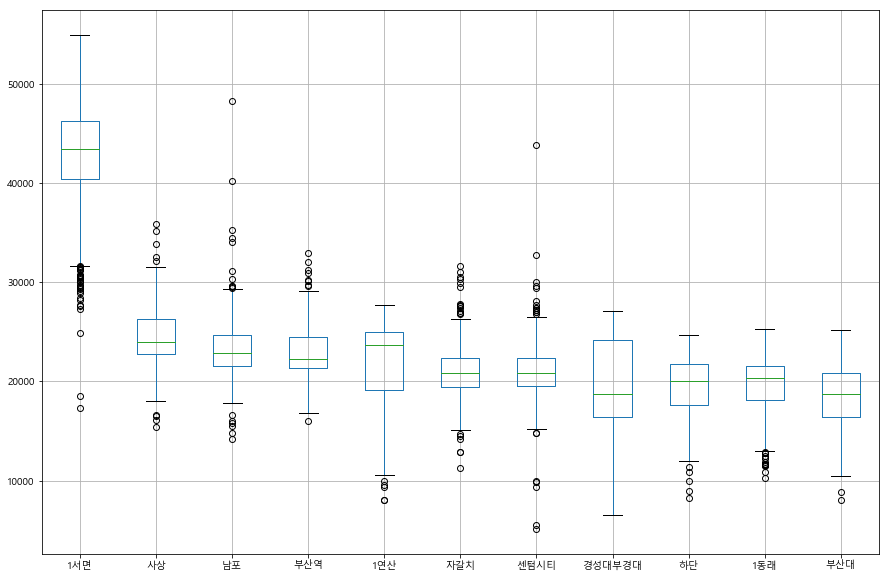

In [22]:
c_lst =df_m.columns[1:12].tolist()  # boxplot표현 컬럼만 리스트로 담기
plt.figure(figsize=(15,10)) #크기지정
boxplot = df_m.boxplot(column=c_lst)
#boxplot = df_m.boxplot(column=['1서면','사상','남포','부산역','1연산','자갈치','센텀시티','경성대부경대','하단','1동래','부산대'])
plt.show()

In [23]:
df_m.describe()

,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,42398.487671,24501.038356,23267.794521,22950.198630,21432.424658,21009.902740,20863.402740,19519.778082,19494.804110,19427.798630,18281.395890,6.526027,26.430137
std,6221.461540,2999.055819,3175.062645,2722.537702,4869.760550,2848.144432,3367.909622,4865.761867,3100.090457,3113.764282,3200.566285,3.452584,15.067565
min,17367.000000,15426.000000,14222.000000,15961.500000,8020.500000,11239.500000,5100.500000,6537.000000,8192.500000,10297.500000,8033.500000,1.000000,1.000000
25%,40401.500000,22743.000000,21604.000000,21364.500000,19172.000000,19412.000000,19517.500000,16402.000000,17655.000000,18110.000000,16364.000000,4.000000,13.000000
50%,43456.500000,23935.500000,22822.500000,22215.000000,23657.000000,20802.500000,20827.000000,18777.500000,20032.000000,20358.500000,18708.000000,7.000000,26.000000
75%,46229.500000,26341.000000,24723.000000,24497.500000,24988.000000,22328.000000,22389.500000,24221.500000,21784.500000,21586.500000,20875.500000,10.000000,39.000000
max,54967.500000,35919.500000,48325.000000,32978.000000,27695.500000,31644.500000,43898.000000,27084.500000,24653.500000,25323.500000,25194.000000,12.000000,52.000000


## 역별 Outlier 분석

In [24]:
df_m.loc[df_m['남포']>30000]  #12월에 남포동 트리 축제가 있음  12/24~25 성탄절날 4만명이 넘게 이용합  BIFF: 2018년 10월 4일 – 2018년 10월 13일

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주,요일
124,2018-05-05,46570.0,30836.0,34026.5,29146.0,17304.5,29962.0,25693.0,17349.5,17167.5,18680.0,18540.0,5,18,토
285,2018-10-13,46562.5,30370.5,30289.5,27243.0,20410.0,31016.0,25628.0,17259.5,19789.5,22287.0,19562.5,10,41,토
348,2018-12-15,49169.0,28773.5,31181.0,26472.5,21016.0,27840.0,27415.5,16780.5,19297.0,21257.0,17727.5,12,50,토
355,2018-12-22,50918.5,30170.0,35243.0,27959.0,20967.0,29511.0,26843.5,17400.0,20186.5,22301.0,19040.5,12,51,토
357,2018-12-24,54967.5,28491.5,40257.5,27420.5,26016.5,30584.5,24784.0,21257.5,23425.0,23077.5,19838.5,12,52,월
358,2018-12-25,45025.0,26033.0,48325.0,23287.0,14404.0,31644.5,22385.0,15326.5,18640.0,16206.5,17661.5,12,52,화
364,2018-12-31,53311.0,26614.5,34462.5,27526.0,23567.5,30306.5,22104.0,18598.0,21324.0,21292.5,19475.0,12,1,월


In [25]:
df_m.loc[df_m['센텀시티']>26000]  # 지스타(11/17~18)  ,2018-05-31(Thu) ~ 2018-06-10(Sun) / 11일간 센텀맥주축제, 10/27 불꽃축제

,년월일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대,월,주,요일
54,2018-02-24,51866.0,31317.0,29059.5,27101.0,21130.0,26915.0,27695.0,16882.5,18456.5,20622.0,18350.0,2,8,토
152,2018-06-02,46217.5,27961.5,26924.0,24979.0,19857.5,24158.5,26535.0,17991.5,18549.0,20019.0,18345.0,6,22,토
159,2018-06-09,44713.5,27996.0,26529.0,24614.0,20172.0,24711.0,30016.0,18454.0,17945.5,20026.0,17538.0,6,23,토
194,2018-07-14,46639.0,27365.5,25951.0,22708.5,18255.5,22822.5,26299.5,16627.0,18125.5,18582.5,17090.0,7,28,토
250,2018-09-08,46055.5,28712.5,26183.5,23667.0,19069.5,25857.5,26988.0,17150.0,18919.0,19565.5,17572.5,9,36,토
277,2018-10-05,39591.0,23388.0,20280.5,24545.0,22354.0,16086.5,27247.0,21603.5,19548.0,18856.5,18289.5,10,40,금
279,2018-10-07,33559.0,22343.5,23578.0,21641.0,13144.5,21088.5,27183.5,13428.5,15945.0,15135.5,14542.0,10,40,일
280,2018-10-08,47101.5,27117.0,25829.0,25046.5,25155.5,23801.5,27424.5,25201.5,22671.0,22952.5,22135.5,10,41,월
284,2018-10-12,48587.5,28351.0,26770.0,27401.5,26264.5,25482.5,28138.0,24741.5,22936.5,24016.0,22383.5,10,41,금
299,2018-10-27,51135.0,35919.5,29454.0,32978.0,20876.0,27360.0,29630.0,23098.5,20142.0,22948.5,19953.5,10,43,토


## 월, 주, 요일 단위로 group by 해보자

In [26]:
#pd.concat([s1, s2])
#월단위 이용객추이
df_mgm = round(df_m.groupby('월')[c_lst].mean())
#df_mgm = round(df_m.groupby('월').mean())
df_mgm

,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대
월,,,,,,,,,,,
1,42327.0,22970.0,21943.0,22103.0,21270.0,20724.0,19593.0,16304.0,17942.0,18344.0,16542.0
2,43651.0,24233.0,22833.0,23047.0,20673.0,21544.0,19799.0,16490.0,17798.0,18707.0,16742.0
3,43636.0,25730.0,23459.0,22284.0,22519.0,20505.0,20189.0,22608.0,20404.0,20356.0,20689.0
4,42245.0,26055.0,23193.0,23156.0,22501.0,20554.0,20494.0,21788.0,20412.0,20461.0,19716.0
5,43241.0,25381.0,23978.0,23547.0,22091.0,21270.0,20580.0,21954.0,20448.0,20404.0,20320.0
6,40948.0,24219.0,22345.0,22621.0,21394.0,20237.0,21268.0,19483.0,19219.0,19528.0,17947.0
7,42485.0,23494.0,22662.0,22254.0,20616.0,19783.0,21041.0,17110.0,18734.0,18176.0,16639.0
8,41630.0,23530.0,22880.0,23237.0,19661.0,20298.0,20995.0,16264.0,18189.0,17470.0,15642.0
9,39772.0,23796.0,22295.0,21414.0,19861.0,20856.0,19531.0,19385.0,18895.0,18543.0,18052.0


In [27]:
import seaborn as sns

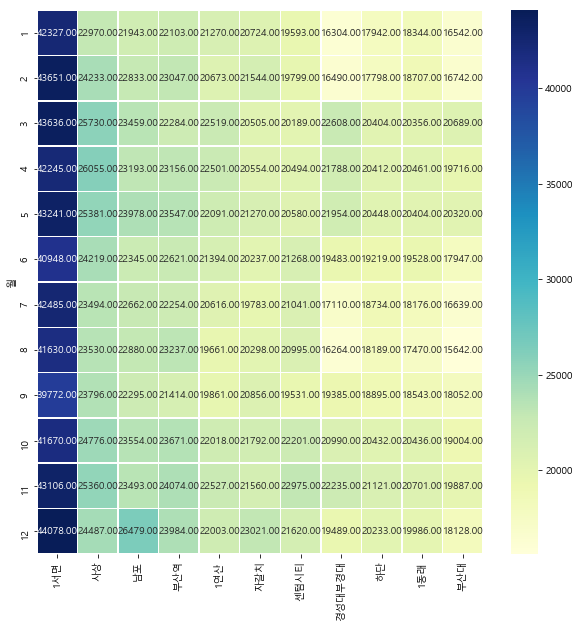

In [28]:
#월단위 시각화
plt.figure(figsize=(10,10))
sns.heatmap(data = df_mgm, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

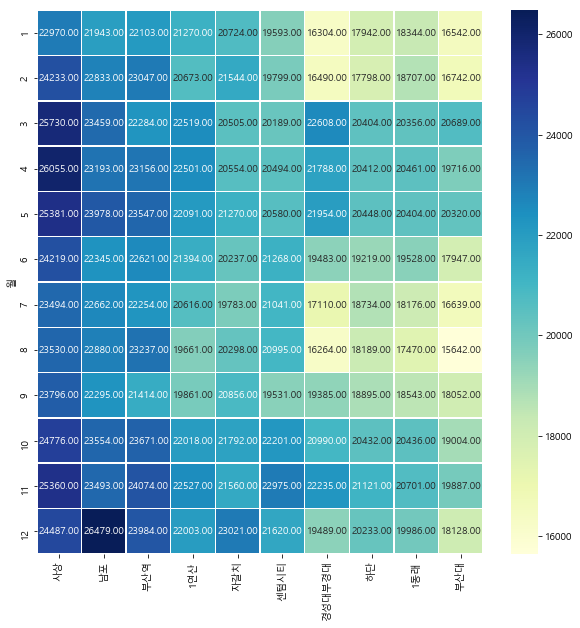

In [29]:
## 서면 이용객이 압도적으로 높아서 서면을 제외하고 그려보자

df_mgm2 = round(df_m.groupby('월')['사상','남포','부산역','1연산','자갈치','센텀시티','경성대부경대','하단','1동래','부산대'].mean())
#월단위 시각화 : 서면제외
plt.figure(figsize=(10,10))
sns.heatmap(data = df_mgm2, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')


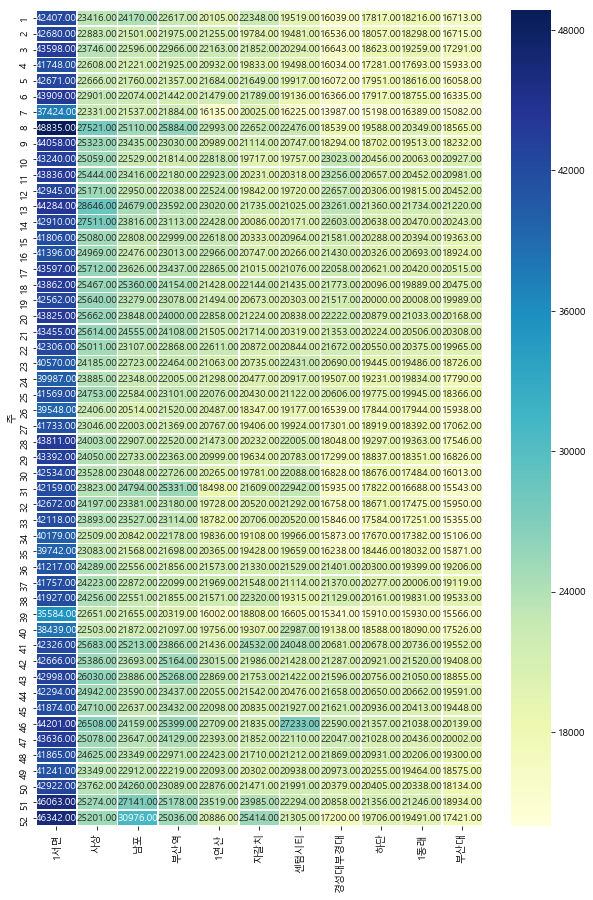

In [30]:
#주단위 이용객추이
df_mgw = round(df_m.groupby('주')[c_lst].mean())
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

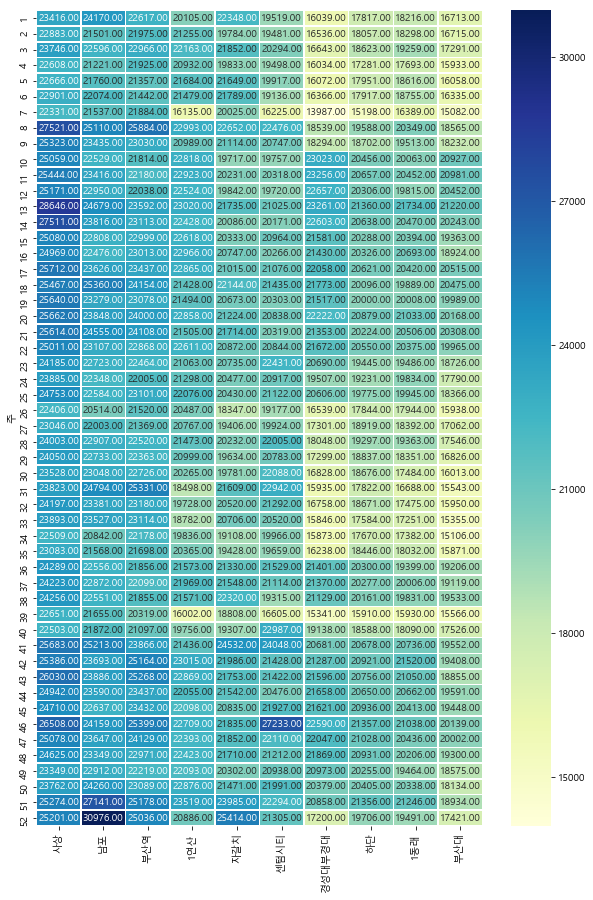

In [31]:
#주단위 이용객추이 : 서면 제외
df_mgw2 = round(df_m.groupby('주')['사상','남포','부산역','1연산','자갈치','센텀시티','경성대부경대','하단','1동래','부산대'].mean())
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw2, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

In [32]:
#요일 단위 이용객추이
df_mgd = round(df_m.groupby('요일')[c_lst].mean())
df_mgd =df_mgd.reset_index()
df_mgd

,요일,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대
0,금,48060.0,27365.0,24460.0,26750.0,25115.0,21672.0,22904.0,22347.0,21440.0,22133.0,20347.0
1,목,43428.0,23520.0,22442.0,22124.0,23501.0,20193.0,21200.0,21886.0,20198.0,20246.0,19546.0
2,수,42313.0,23325.0,22636.0,21592.0,23169.0,20407.0,20577.0,21233.0,22026.0,19931.0,19198.0
3,월,42420.0,23843.0,22261.0,22405.0,23298.0,20529.0,19327.0,21065.0,20106.0,19928.0,18964.0
4,일,31781.0,22199.0,21531.0,21600.0,12571.0,19047.0,17625.0,12231.0,14854.0,14178.0,13292.0
5,토,45777.0,27816.0,26567.0,24504.0,18948.0,24457.0,24104.0,16496.0,17698.0,19425.0,17356.0
6,화,43011.0,23453.0,22997.0,21687.0,23389.0,20773.0,20335.0,21350.0,20130.0,20143.0,19254.0


In [33]:
#요일 단위 시각화  : 요일 순서 정렬 필요
df_mgd = df_mgd.reindex([3,6,2,1,0,5,4])
df_mgd = df_mgd.set_index('요일')

In [34]:
df_mgd

,1서면,사상,남포,부산역,1연산,자갈치,센텀시티,경성대부경대,하단,1동래,부산대
요일,,,,,,,,,,,
월,42420.0,23843.0,22261.0,22405.0,23298.0,20529.0,19327.0,21065.0,20106.0,19928.0,18964.0
화,43011.0,23453.0,22997.0,21687.0,23389.0,20773.0,20335.0,21350.0,20130.0,20143.0,19254.0
수,42313.0,23325.0,22636.0,21592.0,23169.0,20407.0,20577.0,21233.0,22026.0,19931.0,19198.0
목,43428.0,23520.0,22442.0,22124.0,23501.0,20193.0,21200.0,21886.0,20198.0,20246.0,19546.0
금,48060.0,27365.0,24460.0,26750.0,25115.0,21672.0,22904.0,22347.0,21440.0,22133.0,20347.0
토,45777.0,27816.0,26567.0,24504.0,18948.0,24457.0,24104.0,16496.0,17698.0,19425.0,17356.0
일,31781.0,22199.0,21531.0,21600.0,12571.0,19047.0,17625.0,12231.0,14854.0,14178.0,13292.0


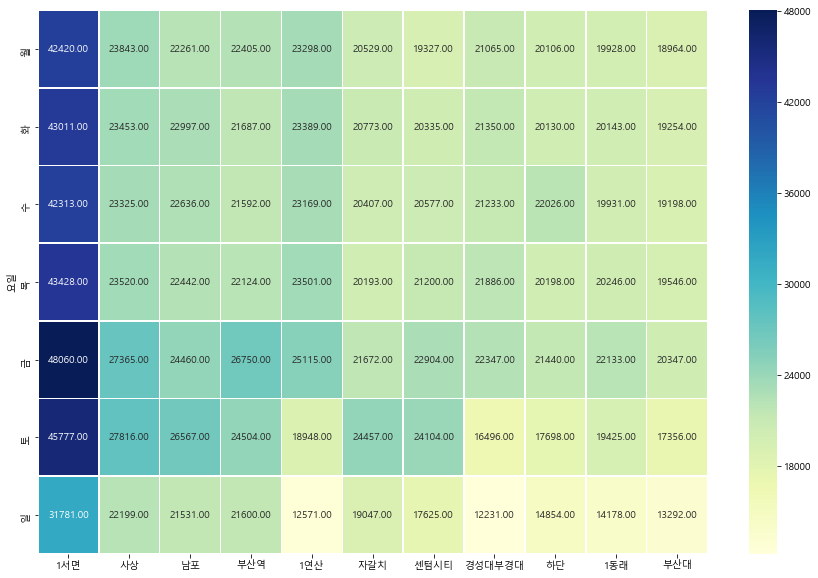

In [35]:
#요일 단위 시각화  : 요일 순서 정렬 필요
plt.figure(figsize=(15,10))
sns.heatmap(data = df_mgd, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')